# Assignment Week 3-4 Data Wrangling with Python: Activity 5 &6

''' 
Name : Karthikeyan Chellamuthu 

Date : 04-10-2022
'''

**1. Data Wrangling with Python: Activity 5 -- Boston Housing Dataset**

In [1]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Create df of Boston housing dataset.
bs_housing = pd.read_csv('Boston_housing.csv')

In [3]:
# verify the first 10 records of df.
bs_housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
# Find the number of records

print('Total number of records in the Boston Housing dataframe: ', len(bs_housing.index))

Total number of records in the Boston Housing dataframe:  506


In [6]:
# Create a mini dataframe with columns that do not include CHAS, NOX, B, and LSTAT

bs_housing_sml = bs_housing.drop(['CHAS', 'NOX', 'B', 'LSTAT'], axis=1)
bs_housing_sml.head()

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3,222,18.7,36.2


In [7]:
# verify the last 7 records of the new dataframe you just created.

bs_housing_sml.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


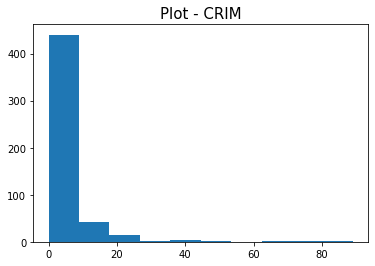

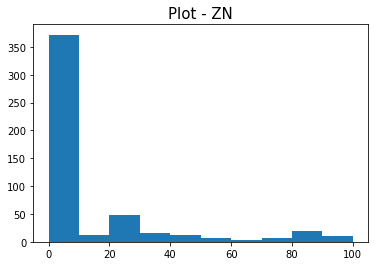

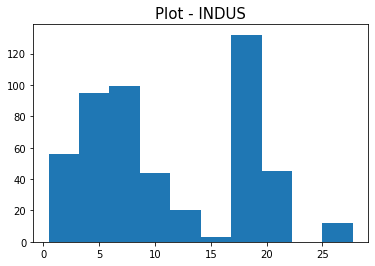

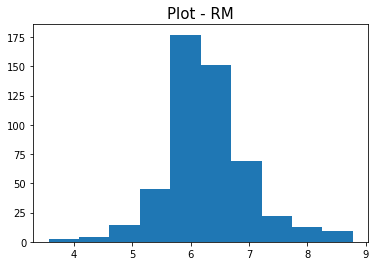

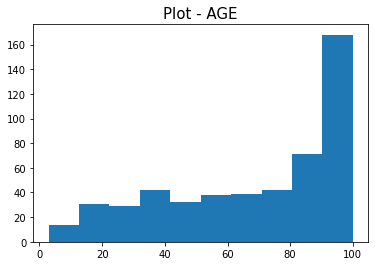

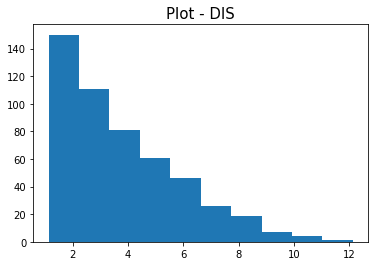

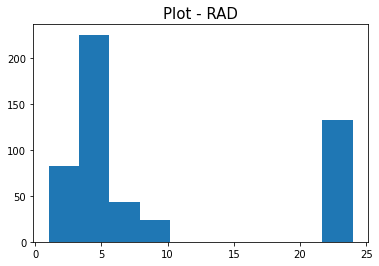

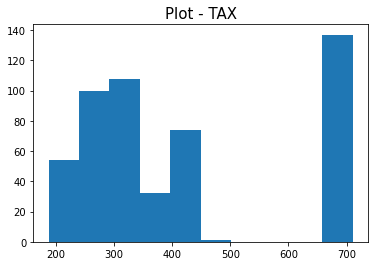

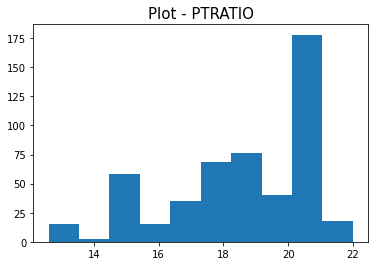

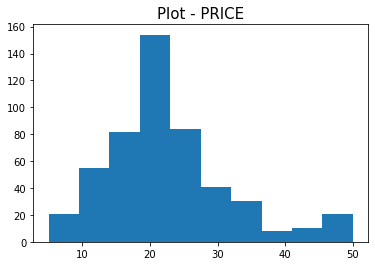

In [8]:
# Draw the histograms of all the variables(columns) in the new dataframe. Plot them all at once using a for loop. Try to add a unique title to a plot.

for x in bs_housing_sml.columns:
    plt.title("Plot - "+x,fontsize=15)    # Name the title of the plot
    plt.hist(bs_housing_sml[x])           # Build hostogram of column
    plt.show()                            # Show the plot

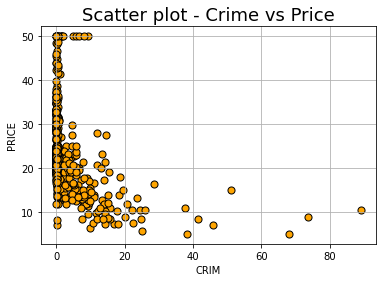

In [9]:
# Plot scatter plot of crime versus price.

bs_housing_sml.plot.scatter('CRIM', 'PRICE', s=50, c='orange', edgecolor='k')
plt.grid(True)
plt.title('Scatter plot - Crime vs Price', fontsize=18)
plt.show()

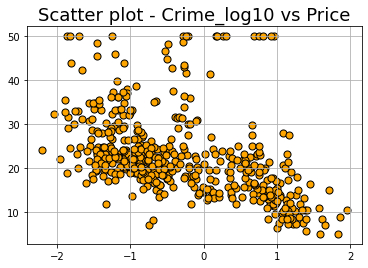

In [10]:
# Plot using log10(crime) vs price.

CRIM_lg = np.log10(bs_housing_sml['CRIM'])

plt.scatter(CRIM_lg, bs_housing_sml['PRICE'], s=50, c='orange', edgecolor='k')
plt.grid(True)
plt.title('Scatter plot - Crime_log10 vs Price', fontsize=18)
plt.show()

In [11]:
# Calculate some useful statistics.

print('mean of room per dwelling: ', bs_housing_sml['RM'].mean())

mean of room per dwelling:  6.284634387351787


In [12]:
print('median of age: ', bs_housing_sml['AGE'].median())

median of age:  77.5


In [13]:
print('mean of distance to five Boston employment center: ', bs_housing_sml['DIS'].mean())

mean of distance to five Boston employment center:  3.795042687747034


In [14]:
# Percentage of houses with low price(<20,000)

Count_low = bs_housing_sml[bs_housing_sml['PRICE'] < 20].count()['PRICE']      # count of low price houses
Count_all = bs_housing_sml['PRICE'].count()                                    # count of all rows

print('percentage of houses with low price(<20k): ', Count_low*100/Count_all)

percentage of houses with low price(<20k):  41.50197628458498


**2. Data Wrangling with Python: Activity 6 -- Adult Income Dataset**

In [15]:
# All necessary libraries are loaded under Activity 5.

# Read Adult Income Dataset from URL/CSV file

adult_inc = pd.read_csv('adult_income_data.csv') 
adult_inc.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


In [16]:
# Read txt file line by line and create list of coulumn names

names = []
with open('adult_income_names.txt', 'r') as t:       # Open txt file for read
    for line in t:                                  
        t.readline()                                 # read line by line
        var=line.split(":")[0]                       # end reading when encountering ':'
        names.append(var)                            # add column name into name list

names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [17]:
# Add a name of Income into list of column names.

names.append('Income')
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Income']

In [18]:
# read the csv file again, with column with list of names as column

adult_inc1 = pd.read_csv('adult_income_data.csv', names=names)
adult_inc1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [19]:
# Find missing value

adult_inc1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

'''I do not see any missing values'''

In [20]:
# Create dataframe with only age, education, and occupation by using subsetting

adult_inc2 = adult_inc1[['age', 'education', 'occupation']]
adult_inc2.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


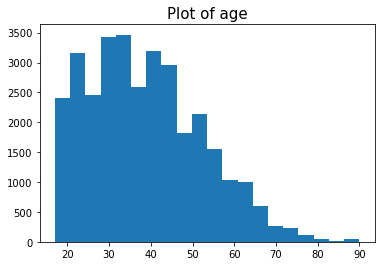

In [21]:
# Plot histogram of age wih a bin size of 20.

plt.title("Plot of age",fontsize=15)   # Name the title of the plot
plt.hist(adult_inc2['age'], bins=20)   # Build hostogram of column
plt.show()                             # Show the plot

In [22]:
# Create a function to strip whitespace characters.

def strip_wt_spc(var):
    var.strip()                       # strip function to remove whitespace
    return

In [23]:
# Apply above function to all columns with string values.

def strip_col(var):                                 # Function to create new col and strip whitespace 
    adult_inc2['newcol'] = var.apply(strip_wt_spc)
    adult_inc2.var = adult_inc2['newcol']           # Replace old col with new col
    
    return

# Strip whitespace from 'education' column
strip_col(adult_inc2['education'])

# Strip whitespace from 'occupation' column
strip_col(adult_inc2['occupation'])

adult_inc2 = adult_inc2.drop(['newcol'], axis=1)
adult_inc2.head()

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_9660/3264325673.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_inc2['newcol'] = var.apply(strip_wt_spc)


,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


In [24]:
# Find number of people who are gaed between 30 and 50

Count = adult_inc2[(30 < adult_inc2['age']) & (adult_inc2['age'] < 50)].count()['age']

print('There are ', Count, ' people aged between 30 and 50.')

There are  14927  people aged between 30 and 50.


In [25]:
# Group the records based on age and education to find how the mean age is distributed. 

adult_inc3 = adult_inc2.groupby(['education'])['age'].mean()

# Display mean of age by education
adult_inc3

education
 10th            37.429796
 11th            32.355745
 12th            32.000000
 1st-4th         46.142857
 5th-6th         42.885886
 7th-8th         48.445820
 9th             41.060311
 Assoc-acdm      37.381443
 Assoc-voc       38.553546
 Bachelors       38.904949
 Doctorate       47.702179
 HS-grad         38.974479
 Masters         44.049913
 Preschool       42.764706
 Prof-school     44.746528
 Some-college    35.756275
Name: age, dtype: float64

<AxesSubplot:xlabel='education'>

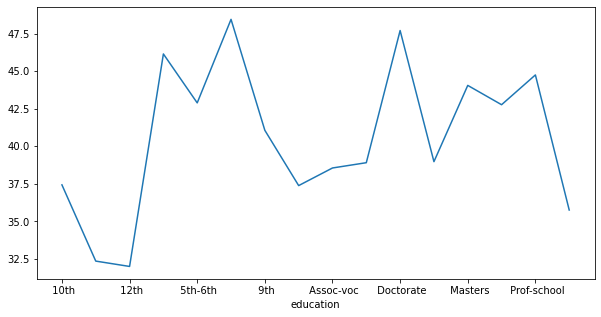

In [26]:
# Plot series of mean

adult_inc3.plot(kind='line', figsize=(10,5))

In [27]:
# Group by occupation and show the summary statistics of age.
adult_inc2.groupby(['occupation'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


"Exec-managerial" occupation has oldest workers with average of 42 years.

"?" has lagest share of the workforce above 75th percentile.

Armed-Forces occupation has least count of '9' and its very low as compared to other occupations. Hence, this group can be considered as outlier

<BarContainer object of 15 artists>

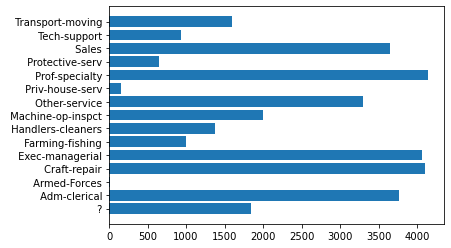

In [28]:
# Plot values on bar chart

summary = adult_inc2.groupby(['occupation'])['age'].describe()  # Write summary into dataframe
plt.barh(summary.index, summary['count'])                       # PLot horizontal bar chart.

In [29]:
# Merge the data using common key
# Create 2 test datasets with one common variable.

adult_inc4 = adult_inc1[['age', 'education', 'occupation']].sample(5, random_state=101) #create DF with 5 sample records.
adult_inc4.head()

,age,education,occupation
22357,51,HS-grad,Machine-op-inspct
26009,19,11th,Sales
20734,40,HS-grad,Exec-managerial
17695,17,10th,Handlers-cleaners
27908,61,7th-8th,Craft-repair


In [30]:
adult_inc5 = adult_inc1[['age', 'marital-status', 'native-country']].sample(5, random_state=101) #create DF with 5 sample records.
adult_inc5.head()

,age,marital-status,native-country
22357,51,Married-civ-spouse,United-States
26009,19,Never-married,United-States
20734,40,Married-civ-spouse,United-States
17695,17,Never-married,United-States
27908,61,Married-civ-spouse,Poland


In [31]:
# Merge above 2 dataframes using age column

adult_mrg = pd.merge(adult_inc4, adult_inc5, on='age', how='inner') 
adult_mrg

,age,education,occupation,marital-status,native-country
0,51,HS-grad,Machine-op-inspct,Married-civ-spouse,United-States
1,19,11th,Sales,Never-married,United-States
2,40,HS-grad,Exec-managerial,Married-civ-spouse,United-States
3,17,10th,Handlers-cleaners,Never-married,United-States
4,61,7th-8th,Craft-repair,Married-civ-spouse,Poland


**3. Create a series and practice basic arithmetic steps**

In [32]:
# series 1

data1 = [7.3, -2.5, 3.4, 1.5]
label1 = ['a', 'c', 'd', 'e']

series1 = pd.Series(data=data1, index=label1)      # Create series
print(series1)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64


In [33]:
# Series 2

data2 = [-2.1, 3.6, -1.5, 4, 3.1]
label2 = ['a', 'c', 'e', 'f', 'g']

series2 = pd.Series(data=data2, index=label2)      # Create series
print(series2)

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64


In [34]:
# Add both series

series_sum = series1 + series2
print(series_sum)

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64


In [35]:
# Substract series1 from series2

series_sub = series2 - series1
print(series_sub)

a   -9.4
c    6.1
d    NaN
e   -3.0
f    NaN
g    NaN
dtype: float64
